In [33]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import math as m
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

# Import integration class
from pyACC.cosmology import Dc

# Import pandas
#import pandas as pd

**Compute cosmological distances**

In this exercise you will keep practicing integration in a cosmological context. In particular you will compute cosmological distances.

The basis to compute distances is the Hubble function $H(z)$, which describes the evolution of the backgroud.

For flat $\Lambda$CDM cosmology it reads:

$D_c(z)=\int_{0}^{z}\frac{cdz'}{H(z')}$.

Implement this function, or try your favourite cosmological model!

In [34]:
def hubble_function(z,OmegaM,H0):
    return H0*m.sqrt(OmegaM*(1+z)**3+1-OmegaM)

In [35]:
# Now use the function you've implemented to compute cosmological distances
# Use the class you've implemented
OmegaM=0.3
H0=72
get_distances = Dc(hubble_function,1,OmegaM,H0)

In [36]:
# Comoving distance at z=1
print(get_distances, "Mpc")

2024-03-06 15:47:57.678909 :: pyACC.CosmologicalDistances  :: 3218.4461518574512 Mpc


In [37]:
# array of redshifts
z_list = np.linspace(0.0001, 2.5, 100)

# Calculate the comoving distance at each redshift in z_list
comoving_distance = []
for i in range(0,len(z_list)):
    comoving_distance.append(Dc(hubble_function,z_list[i],OmegaM,H0))

# Calculate the angular diameter distance at each redshift in z_list
angular_diameter_distance = []
for i in range(0,len(z_list)):
    angular_diameter_distance.append(comoving_distance[i]/(1+z_list[i]))

# Calculate the luminosity distance at each redshift in z_list
luminosity_distance = []
for i in range(0,len(z_list)):
    luminosity_distance.append(comoving_distance[i]*(1+z_list[i]))

# Calculate the distance modulus at each redshift in z_list
distance_modulus = []
for i in range(0,len(z_list)):
    distance_modulus.append(5*m.log10(luminosity_distance[i]*10**5))

#for i in range(0,len(z_list)):
    #print(z_list[i],comoving_distance[i],angular_diameter_distance[i],luminosity_distance[i],distance_modulus[i])

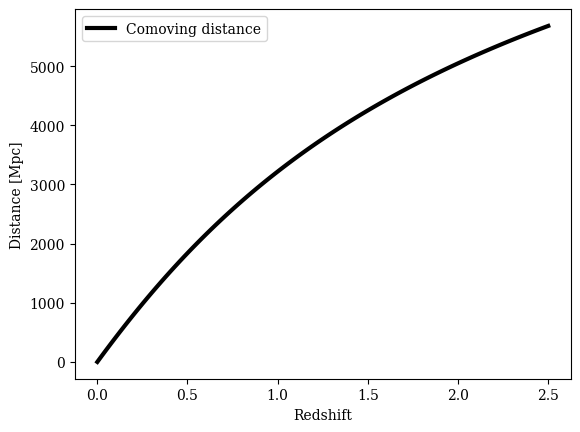

In [38]:
plt.plot(z_list, comoving_distance, lw=3, color="k", label="Comoving distance")

plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

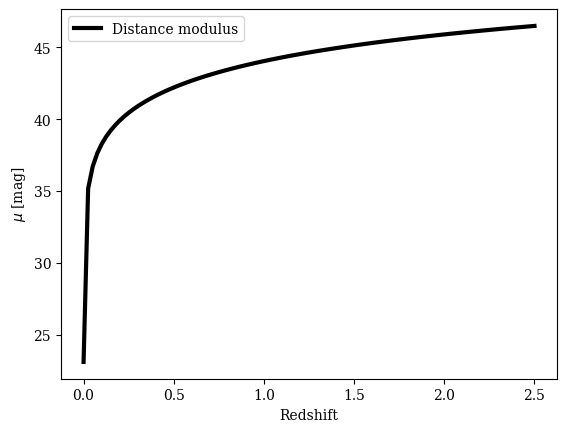

In [39]:
plt.plot(z_list, distance_modulus, lw=3, color="k", label="Distance modulus")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]");

**Compare against experimental data**

Let's plot the SNIa distance moduli from Pantheon+ analysis against your favourite cosmological model.

Check out the paper. Data are stored here. Try to understand which table you should use for the plot.

In [ ]:
# Read the data from Pantheon+ set. 
# Suggestion #1: pandas
# Suggestion #2: read the documentation to understand which column you should pick

In [ ]:
plt.plot(z_list, distance_modulus, lw=2, color="k", label="LCDM - Distance modulus", zorder=1000)
plt.errorbar(.., ..., ..., fmt="o", color="0.5", alpha=0.5, label="Pantheon+")

plt.grid(True, color="0.9", ls="--")
plt.legend(loc="lower right")
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]")